In [1]:

import pandas as pd
import numpy as np
!pip install umap-learn
from umap import UMAP
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import LabelEncoder







   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 893.0 kB/s eta 0:00:00


# Load the data and inspect it

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path= '/content/drive/My Drive/IU/mental-heath-in-tech-2016_20161114.csv'
df = pd.read_csv(file_path)

for col in df.columns:
    print(col)

original_column_names = df.columns.tolist()  # orig_columns

Mounted at /content/drive
Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequenc

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:


original_column_names = df.columns.tolist()
new_column_names = [
    "self_employed",  # Are you self-employed?
    "company_size",  # How many employees does your company or organization have?
    "tech_company",  # Is your employer primarily a tech company/organization?
    "tech_role",  # Is your primary role within your company related to tech/IT?
    "mental_health_benefits",  # Does your employer provide mental health benefits as part of healthcare coverage?
    "benefits_knowledge",  # Do you know the options for mental health care available under your employer-provided coverage?
    "employer_mental_health_discussions",  # Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
    "mental_health_resources",  # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
    "treatment_anonymity",  # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
    "medical_leave_comfort",  # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
    "negative_consequences_disclosure_employer",  # Do you think that discussing a mental health disorder with your employer would have negative consequences?
    "negative_consequences_physical_disclosure_employer",  # Do you think that discussing a physical health issue with your employer would have negative consequences?
    "mental_health_disclosure_coworkers",  # Would you feel comfortable discussing a mental health disorder with your coworkers?
    "mental_health_disclosure_supervisor",  # Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
    "employer_mental_health_seriousness",  # Do you feel that your employer takes mental health as seriously as physical health?
    "observed_negative_consequences_colleagues",  # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
    "has_medical_coverage",  # Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?
    "knows_local_resources",  # Do you know local or online resources to seek help for a mental health disorder?
    "disclosed_to_clients",  # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
    "negative_impact_client_disclosure",  # If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
    "disclosed_to_coworkers",  # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
    "negative_impact_coworker_disclosure",  # If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
    "productivity_affected",  # Do you believe your productivity is ever affected by a mental health issue?
    "productivity_affected_percentage",  # If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
    "has_previous_employers",  # Do you have previous employers?
    "previous_employers_benefits",  # Have your previous employers provided mental health benefits?
    "previous_employers_benefits_knowledge",  # Were you aware of the options for mental health care provided by your previous employers?
    "previous_employers_mental_health_discussions",  # Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
    "previous_employers_mental_health_resources",  # Did your previous employers provide resources to learn more about mental health issues and how to seek help?
    "previous_employers_treatment_anonymity",  # Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    "previous_employers_disclosure_consequences",  # Do you think that discussing a mental health disorder with previous employers would have negative consequences?
    "previous_employers_physical_disclosure_consequences",  # Do you think that discussing a physical health issue with previous employers would have negative consequences?
    "willing_to_discuss_mental_health_previous_coworkers",  # Would you have been willing to discuss a mental health issue with your previous co-workers?
    "willing_to_discuss_mental_health_previous_supervisors",  # Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
    "previous_employers_mental_health_seriousness",  # Did you feel that your previous employers took mental health as seriously as physical health?
    "observed_negative_consequences_previous_colleagues",  # Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
    "willing_to_discuss_physical_health_interview",  # Would you be willing to bring up a physical health issue with a potential employer in an interview?
    "physical_health_interview_reason",  # Why or why not?
    "willing_to_discuss_mental_health_interview",  # Would you bring up a mental health issue with a potential employer in an interview?
    "mental_health_interview_reason",  # Why or why not?.1
    "career_impact_mental_health",  # Do you feel that being identified as a person with a mental health issue would hurt your career?
    "team_perception_mental_health",  # Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
    "willingness_to_share_with_family",  # How willing would you be to share with friends and family that you have a mental illness?
    "observed_unsupportive_responses",  # Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
    "less_likely_to_disclose_due_to_observations",  # Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
    "family_history_mental_illness",  # Do you have a family history of mental illness?
    "past_mental_health_disorder",  # Have you had a mental health disorder in the past?
    "current_mental_health_disorder",  # Do you currently have a mental health disorder?
    "diagnosed_conditions",  # If yes, what condition(s) have you been diagnosed with?
    "believed_conditions",  # If maybe, what condition(s) do you believe you have?
    "diagnosed_by_professional",  # Have you been diagnosed with a mental health condition by a medical professional?
    "diagnosed_conditions_professional",  # If so, what condition(s) were you diagnosed with?
    "sought_treatment",  # Have you ever sought treatment for a mental health issue from a mental health professional?
    "work_interference_treated",  # If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
    "work_interference_untreated",  # If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
    "age",  # What is your age?
    "gender",  # What is your gender?
    "country_of_residence",  # What country do you live in?
    "us_state_residence",  # What US state or territory do you live in?
    "country_of_work",  # What country do you work in?
    "us_state_work",  # What US state or territory do you work in?
    "work_position",  # Which of the following best describes your work position?
    "remote_work",  # Do you work remotely?
]

df.columns = new_column_names

# the number of columns remains the same
assert len(original_column_names) == len(new_column_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


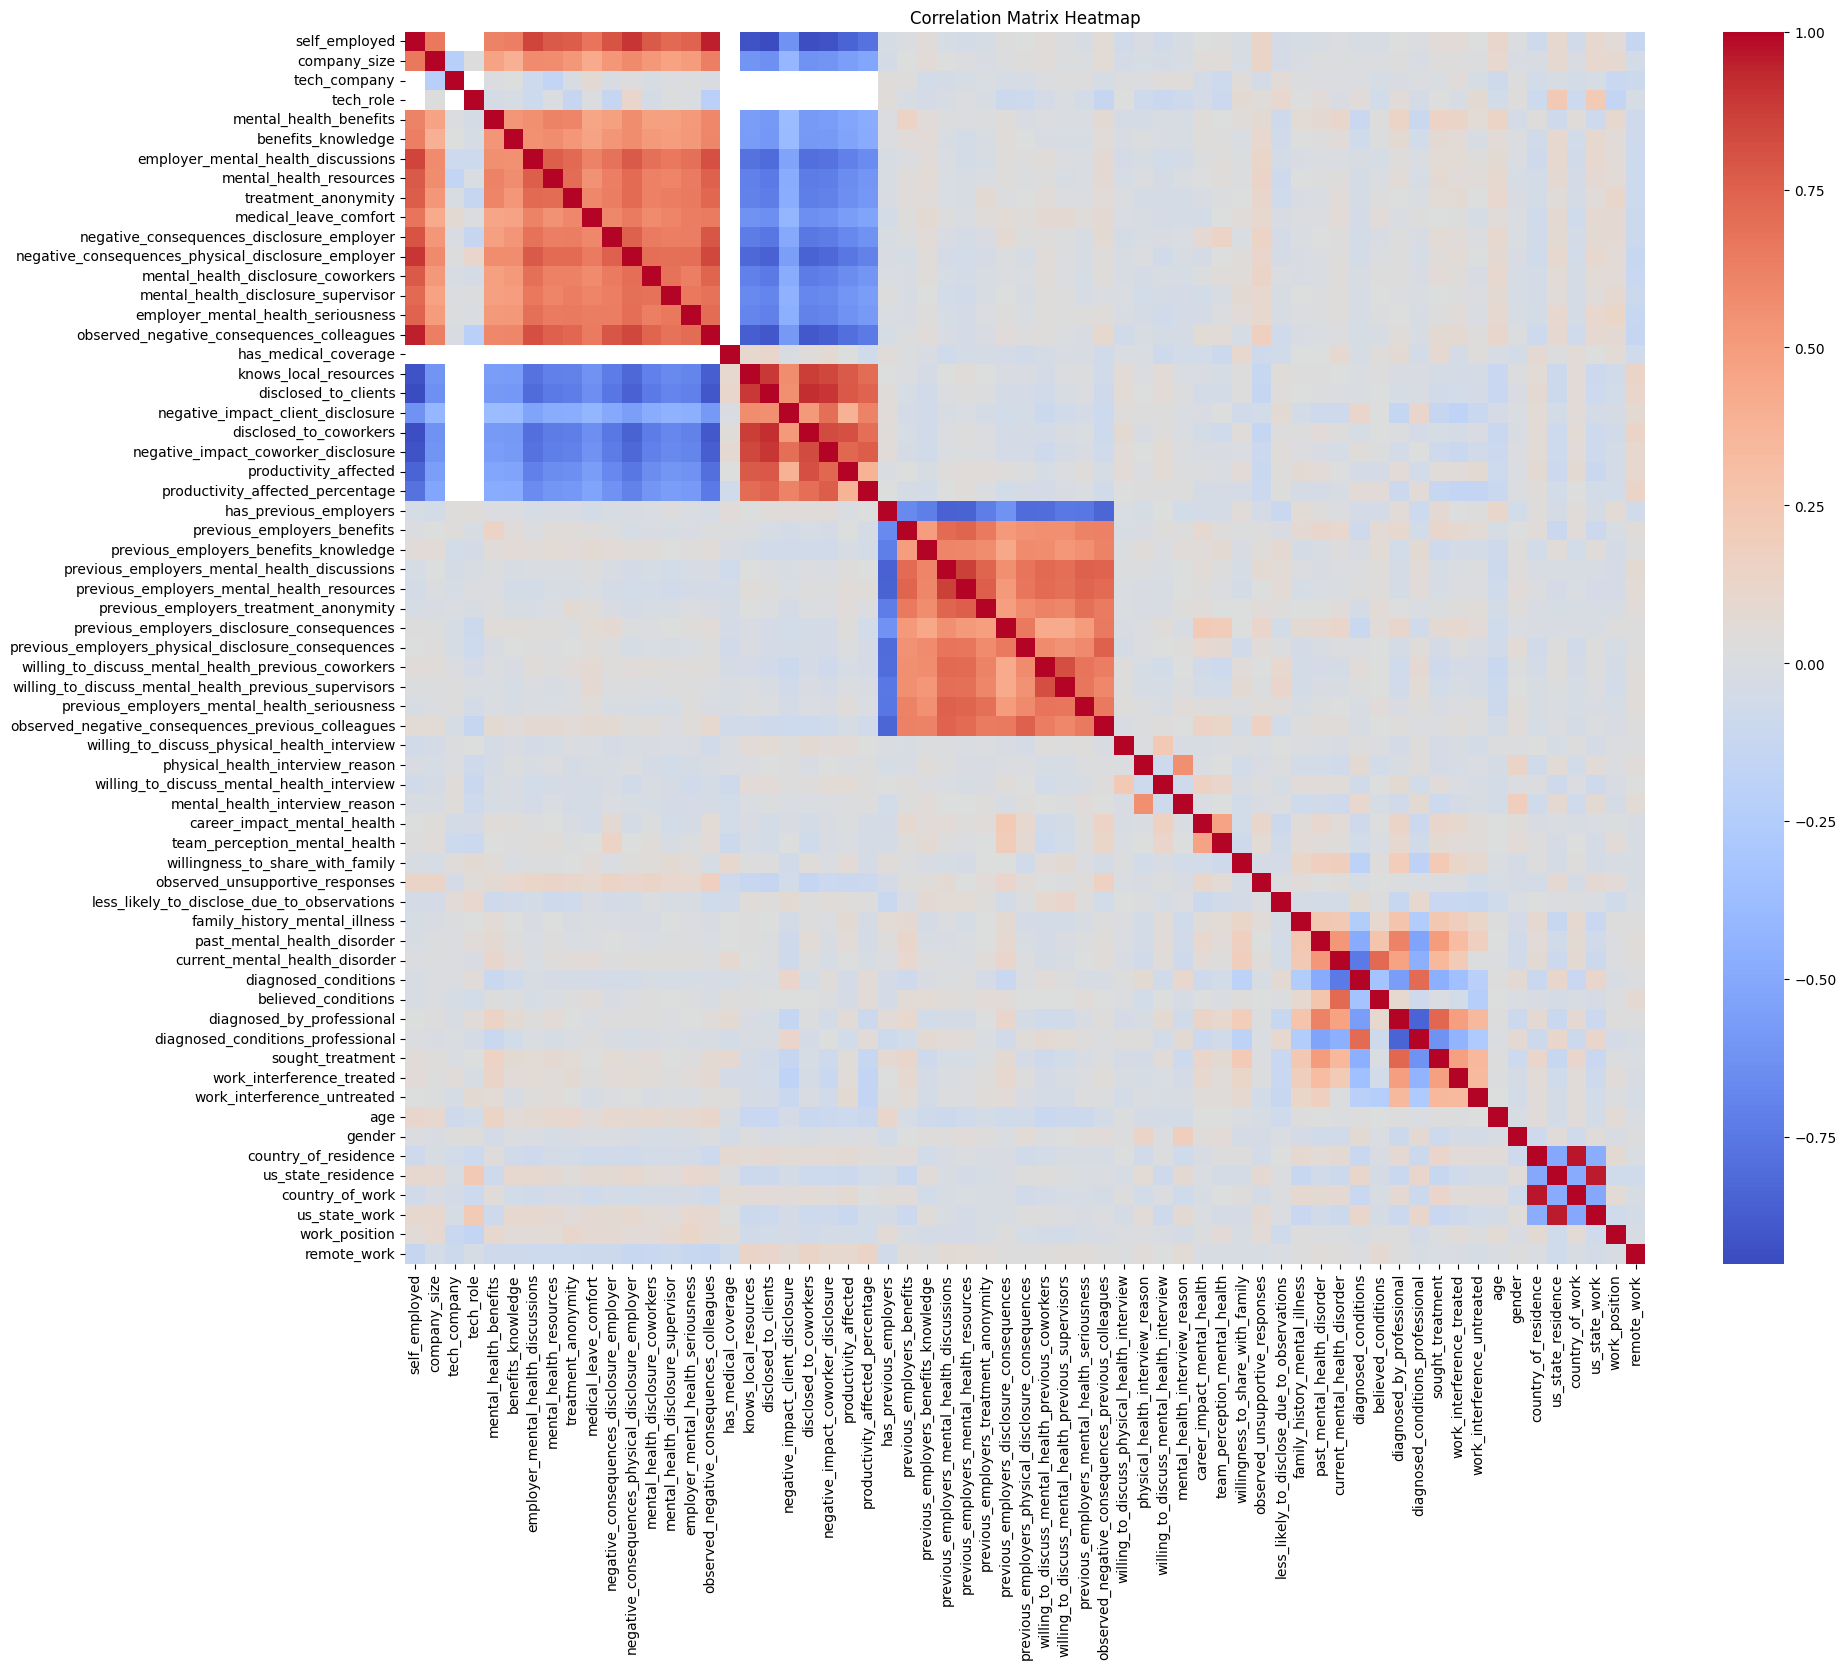

Strong Correlations (absolute value > 0.7):
self_employed and employer_mental_health_discussions: 0.85
self_employed and mental_health_resources: 0.78
self_employed and treatment_anonymity: 0.77
self_employed and negative_consequences_disclosure_employer: 0.80
self_employed and negative_consequences_physical_disclosure_employer: 0.90
self_employed and mental_health_disclosure_coworkers: 0.78
self_employed and mental_health_disclosure_supervisor: 0.72
self_employed and employer_mental_health_seriousness: 0.75
self_employed and observed_negative_consequences_colleagues: 0.95
self_employed and knows_local_resources: -0.92
self_employed and disclosed_to_clients: -0.95
self_employed and disclosed_to_coworkers: -0.94
self_employed and negative_impact_coworker_disclosure: -0.92
self_employed and productivity_affected: -0.84
self_employed and productivity_affected_percentage: -0.78
employer_mental_health_discussions and mental_health_resources: 0.76
employer_mental_health_discussions and treat

In [46]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

!pip install umap-learn

# Load the data and inspect it
drive.mount('/content/drive')

file_path= '/content/drive/My Drive/IU/mental-heath-in-tech-2016_20161114.csv'
df = pd.read_csv(file_path)

original_column_names = df.columns.tolist()
new_column_names = [
    "self_employed",  # Are you self-employed?
    "company_size",  # How many employees does your company or organization have?
    "tech_company",  # Is your employer primarily a tech company/organization?
    "tech_role",  # Is your primary role within your company related to tech/IT?
    "mental_health_benefits",  # Does your employer provide mental health benefits as part of healthcare coverage?
    "benefits_knowledge",  # Do you know the options for mental health care available under your employer-provided coverage?
    "employer_mental_health_discussions",  # Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
    "mental_health_resources",  # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
    "treatment_anonymity",  # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
    "medical_leave_comfort",  # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
    "negative_consequences_disclosure_employer",  # Do you think that discussing a mental health disorder with your employer would have negative consequences?
    "negative_consequences_physical_disclosure_employer",  # Do you think that discussing a physical health issue with your employer would have negative consequences?
    "mental_health_disclosure_coworkers",  # Would you feel comfortable discussing a mental health disorder with your coworkers?
    "mental_health_disclosure_supervisor",  # Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
    "employer_mental_health_seriousness",  # Do you feel that your employer takes mental health as seriously as physical health?
    "observed_negative_consequences_colleagues",  # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
    "has_medical_coverage",  # Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?
    "knows_local_resources",  # Do you know local or online resources to seek help for a mental health disorder?
    "disclosed_to_clients",  # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
    "negative_impact_client_disclosure",  # If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
    "disclosed_to_coworkers",  # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
    "negative_impact_coworker_disclosure",  # If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
    "productivity_affected",  # Do you believe your productivity is ever affected by a mental health issue?
    "productivity_affected_percentage",  # If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
    "has_previous_employers",  # Do you have previous employers?
    "previous_employers_benefits",  # Have your previous employers provided mental health benefits?
    "previous_employers_benefits_knowledge",  # Were you aware of the options for mental health care provided by your previous employers?
    "previous_employers_mental_health_discussions",  # Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
    "previous_employers_mental_health_resources",  # Did your previous employers provide resources to learn more about mental health issues and how to seek help?
    "previous_employers_treatment_anonymity",  # Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    "previous_employers_disclosure_consequences",  # Do you think that discussing a mental health disorder with previous employers would have negative consequences?
    "previous_employers_physical_disclosure_consequences",  # Do you think that discussing a physical health issue with previous employers would have negative consequences?
    "willing_to_discuss_mental_health_previous_coworkers",  # Would you have been willing to discuss a mental health issue with your previous co-workers?
    "willing_to_discuss_mental_health_previous_supervisors",  # Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
    "previous_employers_mental_health_seriousness",  # Did you feel that your previous employers took mental health as seriously as physical health?
    "observed_negative_consequences_previous_colleagues",  # Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
    "willing_to_discuss_physical_health_interview",  # Would you be willing to bring up a physical health issue with a potential employer in an interview?
    "physical_health_interview_reason",  # Why or why not?
    "willing_to_discuss_mental_health_interview",  # Would you bring up a mental health issue with a potential employer in an interview?
    "mental_health_interview_reason",  # Why or why not?.1
    "career_impact_mental_health",  # Do you feel that being identified as a person with a mental health issue would hurt your career?
    "team_perception_mental_health",  # Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
    "willingness_to_share_with_family",  # How willing would you be to share with friends and family that you have a mental illness?
    "observed_unsupportive_responses",  # Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
    "less_likely_to_disclose_due_to_observations",  # Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
    "family_history_mental_illness",  # Do you have a family history of mental illness?
    "past_mental_health_disorder",  # Have you had a mental health disorder in the past?
    "current_mental_health_disorder",  # Do you currently have a mental health disorder?
    "diagnosed_conditions",  # If yes, what condition(s) have you been diagnosed with?
    "believed_conditions",  # If maybe, what condition(s) do you believe you have?
    "diagnosed_by_professional",  # Have you been diagnosed with a mental health condition by a medical professional?
    "diagnosed_conditions_professional",  # If so, what condition(s) were you diagnosed with?
    "sought_treatment",  # Have you ever sought treatment for a mental health issue from a mental health professional?
    "work_interference_treated",  # If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
    "work_interference_untreated",  # If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
    "age",  # What is your age?
    "gender",  # What is your gender?
    "country_of_residence",  # What country do you live in?
    "us_state_residence",  # What US state or territory do you live in?
    "country_of_work",  # What country do you work in?
    "us_state_work",  # What US state or territory do you work in?
    "work_position",  # Which of the following best describes your work position?
    "remote_work",  # Do you work remotely?
]

df.columns = new_column_names

# Convert object type columns to 'category'
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

# Calculate the correlation matrix
correlation_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


# Create the heatmap

In [5]:
print(new_column_names)

['self_employed', 'company_size', 'tech_company', 'tech_role', 'mental_health_benefits', 'benefits_knowledge', 'employer_mental_health_discussions', 'mental_health_resources', 'treatment_anonymity', 'medical_leave_comfort', 'negative_consequences_disclosure_employer', 'negative_consequences_physical_disclosure_employer', 'mental_health_disclosure_coworkers', 'mental_health_disclosure_supervisor', 'employer_mental_health_seriousness', 'observed_negative_consequences_colleagues', 'has_medical_coverage', 'knows_local_resources', 'disclosed_to_clients', 'negative_impact_client_disclosure', 'disclosed_to_coworkers', 'negative_impact_coworker_disclosure', 'productivity_affected', 'productivity_affected_percentage', 'has_previous_employers', 'previous_employers_benefits', 'previous_employers_benefits_knowledge', 'previous_employers_mental_health_discussions', 'previous_employers_mental_health_resources', 'previous_employers_treatment_anonymity', 'previous_employers_disclosure_consequences', '

In [6]:
# summary statistics for all columns
column_summary = df.describe(include='all').T

print(column_summary.to_string())

                                                        count unique                                                                                                    top  freq       mean        std  min   25%   50%   75%    max
self_employed                                          1433.0    NaN                                                                                                    NaN   NaN   0.200279   0.400349  0.0   0.0   0.0   0.0    1.0
company_size                                             1146      6                                                                                                 26-100   292        NaN        NaN  NaN   NaN   NaN   NaN    NaN
tech_company                                           1146.0    NaN                                                                                                    NaN   NaN   0.770506   0.420691  0.0   1.0   1.0   1.0    1.0
tech_role                                               263.0    NaN            

In [7]:
#  unique values
for column in df.columns:
    print(f"\nUnique values in '{column}':\n")
    print(df[column].value_counts())
    print("-" * 40)


Unique values in 'self_employed':

self_employed
0    1146
1     287
Name: count, dtype: int64
----------------------------------------

Unique values in 'company_size':

company_size
26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: count, dtype: int64
----------------------------------------

Unique values in 'tech_company':

tech_company
1.0    883
0.0    263
Name: count, dtype: int64
----------------------------------------

Unique values in 'tech_role':

tech_role
1.0    248
0.0     15
Name: count, dtype: int64
----------------------------------------

Unique values in 'mental_health_benefits':

mental_health_benefits
Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64
----------------------------------------

Unique values in 'benefits_knowledge':

benefits_knowled

# Data cleaning

In [8]:

uncertain_answers = [
    'Not applicable to me',
    'I don\'t know',
    'I\'m not sure',
    'N/A (not currently aware)',
    'Not eligible for coverage / N/A',
    'Not applicable to me (I do not have a mental illness)'
]

# replace uncertain answers with NaN
df = df.replace(uncertain_answers, np.nan)

In [9]:
# define a mapping for country abbreviations
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom': 'UK'
}

# replace country names with abbreviations in the specified columns (using the renamed column names)
df[['country_of_residence', 'country_of_work']] = df[['country_of_residence', 'country_of_work']].replace(country_mapping)

# count instances where country_work differs from country_residence
num_different_countries = (df['country_of_residence'] != df['country_of_work']).sum()
percentage_different_countries = (num_different_countries / len(df)) * 100
print(f"\nPercentage of people working in a different country than they reside: {percentage_different_countries:.2f}%")

# Drop unnecessary columns
df.drop(columns=['country_of_residence', 'us_state_residence', 'us_state_work'], inplace=True)


Percentage of people working in a different country than they reside: 1.81%


In [10]:
# Drop the columns with contextual data
df.drop(columns=['physical_health_interview_reason', 'mental_health_interview_reason'], inplace=True)

In [11]:

print(np.sort(df['age'].unique()))
age_copy = df['age'].copy()

df['age'] = df['age'].apply(lambda x: np.nan if x < 18 or x > 75 else x)
age_checksum = (df['age'] != age_copy).sum()
print(f'Replaced age outliers with NaN for {age_checksum} rows.')

age_copy_2 = df['age'].copy()

age_median = df['age'].median()

# Fill missing age values with the median
df['age'].fillna(age_median, inplace=True)
age_checksum_2 = (age_copy_2 != df['age']).sum()
print(f'Filled missing age values with the median: {age_median} for {age_checksum_2} rows.')

# age categories
df['age_category'] = pd.cut(
    df['age'],
    bins=[18, 30, 40, 50, 60, float('inf')],  # Extend bins to include all ages above 60
    labels=['18-30', '30-40', '40-50', '50-60', '60+'],
    right=False
)

print(df['age_category'].value_counts())

[  3  15  17  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  61  62  63  65  66  70  74  99 323]
Replaced age outliers with NaN for 5 rows.
Filled missing age values with the median: 33.0 for 5 rows.
age_category
30-40    683
18-30    447
40-50    235
50-60     57
60+       11
Name: count, dtype: int64


<ipython-input-11-777844373a6c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_median, inplace=True)


In [12]:
df['company_size'] = df['company_size'].replace('More than 1000', '1000+')

In [13]:

original_row_count = df.shape[0]

# drop rows with more than (60%) missing values
df = df.dropna(thresh=int(df.shape[1] * 0.60))


dropped_rows_percent = ((original_row_count - df.shape[0]) / original_row_count) * 100
print(f'Dropped {dropped_rows_percent:.2f}% of rows due to missing values.')

Dropped 15.14% of rows due to missing values.


In [14]:

nan_percentage = (df.isna().sum() / len(df)) * 100
nan_percentage_sorted = nan_percentage.sort_values(ascending=False)

print(nan_percentage_sorted.to_string())

# drop columns with more than 50% NaN values
columns_to_drop = nan_percentage_sorted[nan_percentage_sorted > 65].index
df.drop(columns=columns_to_drop, inplace=True)

negative_impact_client_disclosure                        94.572368
negative_impact_coworker_disclosure                      93.914474
disclosed_to_coworkers                                   88.486842
productivity_affected_percentage                         88.157895
disclosed_to_clients                                     87.828947
productivity_affected                                    86.595395
has_medical_coverage                                     86.595395
knows_local_resources                                    86.595395
tech_role                                                79.934211
believed_conditions                                      77.220395
treatment_anonymity                                      68.667763
previous_employers_treatment_anonymity                   67.351974
diagnosed_conditions                                     55.509868
less_likely_to_disclose_due_to_observations              50.328947
employer_mental_health_seriousness                       49.50

<ipython-input-14-3b2270f210b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [15]:
#fixing gender information
gender_map = {
    **{key: 'male' for key in ['Male', 'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Male.',
                               'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
                               'cis male', 'Malr', 'Dude',
                               "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                               'mail', 'M|', 'Male/genderqueer', 'male ', 'Cis Male',
                               'Male (trans, FtM)', 'cisdude', 'cis man', 'MALE']},
    **{key: 'female' for key in ['Female', 'female', 'I identify as female.', 'female ',
                                 'Female assigned at birth ',
                                 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
                                 'Genderfluid (born female)', 'Female or Multi-Gender Femme',
                                 'Female ', 'woman', 'female/woman', 'Cisgender Female', 'fem',
                                 'Female (props for making this a freeform field, though)',
                                 ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
                                 'AFAB']}
}


gender_before = df['gender'].value_counts()


df['gender'] = df['gender'].replace(gender_map).apply(lambda x: 'queer' if x not in ['male', 'female'] else x)

print('Before:\n', gender_before, '\n\n\nAfter:\n', df['gender'].value_counts())

Before:
 gender
Male                     519
male                     202
Female                   142
female                    89
M                         70
                        ... 
Man                        1
Sex is male                1
none of your business      1
genderqueer                1
Transgender woman          1
Name: count, Length: 62, dtype: int64 


After:
 gender
male      876
female    313
queer      27
Name: count, dtype: int64


<ipython-input-15-9fc084fbf8c0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace(gender_map).apply(lambda x: 'queer' if x not in ['male', 'female'] else x)


In [16]:
# 3 categories of answers
answer_map = {
    **{key: 'Yes' for key in ['Yes, I think it would', 'Yes, it has', 'Yes, I think they would',
                                'Yes, they do', 'Somewhat open', 'Very open',
                                'Yes', 'Yes, I observed', 'Yes, I experienced']},
    **{key: 'Maybe' for key in ['Maybe', 'Neutral', 'Maybe/Not sure']},
    **{key: 'No' for key in ['No, it has not', 'No, I don\'t think it would',
                             'No, they do not','No, I don\'t think they would',
                             'Not open at all', 'Somewhat not open']}
}

columns_to_replace = ['career_impact_mental_health', 'team_perception_mental_health', 'willingness_to_share_with_family', 'observed_unsupportive_responses']

for column in columns_to_replace:
    df[column] = df[column].replace(answer_map)

for column in columns_to_replace:
    print(f"\nValue counts for '{column}':\n")
    print(df[column].value_counts())
    print("-" * 40)


Value counts for 'career_impact_mental_health':

career_impact_mental_health
Yes      571
Maybe    493
No       152
Name: count, dtype: int64
----------------------------------------

Value counts for 'team_perception_mental_health':

team_perception_mental_health
Maybe    496
Yes      378
No       342
Name: count, dtype: int64
----------------------------------------

Value counts for 'willingness_to_share_with_family':

willingness_to_share_with_family
Yes      783
No       248
Maybe    117
Name: count, dtype: int64
----------------------------------------

Value counts for 'observed_unsupportive_responses':

observed_unsupportive_responses
No       468
Yes      393
Maybe    310
Name: count, dtype: int64
----------------------------------------


<ipython-input-16-19a12d780329>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(answer_map)


In [17]:
# continent mappings
continent_mapping = {
    **{country: 'north_america' for country in ['United States of America', 'Canada', 'Mexico']},
    **{country: 'europe' for country in [
        'United Kingdom', 'Netherlands', 'Germany', 'Sweden', 'France',
        'Ireland', 'Switzerland', 'Bulgaria', 'Finland', 'Denmark',
        'Russia', 'Spain', 'Norway', 'Austria', 'Bosnia and Herzegovina',
        'Italy', 'Poland', 'Belgium', 'Czech Republic']},
}


df['country_of_work'] = df['country_of_work'].apply(lambda x: continent_mapping.get(x, 'Other'))

print(df['country_of_work'].value_counts())


keyword_to_category = {
    'supervisor': 'Management',
    'team lead': 'Management',
    'leadership': 'Management',
    'executive': 'Management',
    'back': 'Development',
    'developer': 'Development',
    'front': 'Development',
    'devops': 'Development',
    'sysadmin': 'Development',
    'dev': 'Development',
}


def categorize_role_optimized(role):
    role = role.lower()  # Standardize to lowercase
    for keyword, category in keyword_to_category.items():
        if keyword in role:
            return category
    return 'Other'  # Default for unmatched roles

# column to lowercase
df['work_position'] = df['work_position'].str.lower()

# categorization function
df['work_position'] = df['work_position'].apply(categorize_role_optimized)

print(df['work_position'].value_counts().to_string())

country_of_work
Other            991
europe           161
north_america     64
Name: count, dtype: int64
work_position
Development    718
Management     297
Other          201


In [18]:

for col in df.columns:
    print(f"\nUnique values in '{col}':\n")
    print(df[col].value_counts().to_string())
    print("-" * 40)


Unique values in 'self_employed':

self_employed
0    1053
1     163
----------------------------------------

Unique values in 'company_size':

company_size
26-100      272
1000+       233
100-500     229
6-25        187
500-1000     76
1-5          56
----------------------------------------

Unique values in 'tech_company':

tech_company
1.0    809
0.0    244
----------------------------------------

Unique values in 'mental_health_benefits':

mental_health_benefits
Yes    511
No     196
----------------------------------------

Unique values in 'benefits_knowledge':

benefits_knowledge
No               321
I am not sure    317
Yes              299
----------------------------------------

Unique values in 'employer_mental_health_discussions':

employer_mental_health_discussions
No     745
Yes    217
----------------------------------------

Unique values in 'mental_health_resources':

mental_health_resources
No     485
Yes    283
----------------------------------------

Unique va

In [19]:
for column in df.columns:
    print(f"\nUnique values in '{column}':\n")
    print(df[column].value_counts().to_string())
    print("-" * 40)

# store the individual values
unique_values = set()

# iterate over the rows and save the unique strings split at '|'
for value in df['diagnosed_conditions_professional']:
    if pd.notna(value):
        unique_values.update(value.split('|'))

print("\nUnique conditions:")
print('\n'.join(unique_values))


Unique values in 'self_employed':

self_employed
0    1053
1     163
----------------------------------------

Unique values in 'company_size':

company_size
26-100      272
1000+       233
100-500     229
6-25        187
500-1000     76
1-5          56
----------------------------------------

Unique values in 'tech_company':

tech_company
1.0    809
0.0    244
----------------------------------------

Unique values in 'mental_health_benefits':

mental_health_benefits
Yes    511
No     196
----------------------------------------

Unique values in 'benefits_knowledge':

benefits_knowledge
No               321
I am not sure    317
Yes              299
----------------------------------------

Unique values in 'employer_mental_health_discussions':

employer_mental_health_discussions
No     745
Yes    217
----------------------------------------

Unique values in 'mental_health_resources':

mental_health_resources
No     485
Yes    283
----------------------------------------

Unique va

In [20]:
df['diagnosed_conditions_professional'] = df['diagnosed_conditions_professional'].apply(
    lambda x: x.split('|') if pd.notna(x) else x
)

In [21]:
# disorders to categories
disorder_category_mapping = {

    # Mood Disorders
    'Depression': 'Mood Disorders',
    'Seasonal Affective Disorder': 'Mood Disorders',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorders',
    'Suicidal Ideation': 'Mood Disorders',

    # Anxiety and Stress-Related Disorders
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety and Stress-Related Disorders',
    'Post-traumatic Stress Disorder': 'Anxiety and Stress-Related Disorders',
    'Stress Response Syndromes': 'Anxiety and Stress-Related Disorders',
    'Obsessive-Compulsive Disorder': 'Anxiety and Stress-Related Disorders',
    'Gender Identity Disorder': 'Anxiety and Stress-Related Disorders',
    'posttraumatic stress disourder': 'Anxiety and Stress-Related Disorders',

    # Neurodevelopmental Disorders
    'Attention Deficit Hyperactivity Disorder': 'Neurodevelopmental Disorders',
    'ADD (w/o Hyperactivity)': 'Neurodevelopmental Disorders',
    'Attention Deficit Disorder': 'Neurodevelopmental Disorders',
    'MCD (when it was diagnosed, the ultra-mega \'disorder\' ADHD didn\'t exist yet)': 'Neurodevelopmental Disorders',
    'Autism Spectrum Disorder': 'Neurodevelopmental Disorders',
    'Autism': 'Neurodevelopmental Disorders',
    'Autism - while not a \'mental illness\', still greatly affects how I handle anxiety': 'Neurodevelopmental Disorders',
    'Asperger Syndrome': 'Neurodevelopmental Disorders',
    'Aspergers': 'Neurodevelopmental Disorders',

    # Group all other disorders into "Other"
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 'Other',
    'Eating Disorder (Anorexia, Bulimia, etc)': 'Other',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 'Other',
    'Dissociative Disorder': 'Other',
    'Substance Use Disorder': 'Substance Use Disorders',
    'Addictive Disorder': 'Substance Use Disorders',
    'Intimate Disorder': 'Other',
}

# function to map disorders to categories
def map_disorders_to_categories(disorder_list):
    if isinstance(disorder_list, list):  # Check if the input is a list
        mapped_categories = []  # Initialize an empty list
        for item in disorder_list:  # Iterate over the list
            mapped_categories.append(disorder_category_mapping.get(item, 'Other'))  # Map the disorder to a category
        return mapped_categories    # Return the list of categories
    else:
        return disorder_list  # Return as-is if not a list

# apply mapping to the DataFrame
df['diagnosed_conditions_professional'] = df['diagnosed_conditions_professional'].apply(map_disorders_to_categories)

df['diagnosed_conditions_professional'] = df['diagnosed_conditions_professional'].apply(
    lambda x: max(set(x), key=x.count) if isinstance(x, list) else x
)

In [22]:
# unique values in the column
print(df['diagnosed_conditions_professional'].value_counts())

diagnosed_conditions_professional
Anxiety and Stress-Related Disorders    394
Mood Disorders                          218
Neurodevelopmental Disorders             28
Substance Use Disorders                  22
Other                                    15
Name: count, dtype: int64


In [23]:
# missing value counts per column
for col in df.columns:
    print(f'\n{col}:')
    print('Number of missing values: ', df[col].isna().sum())
    print('Most frequent value:      ', df[col].mode().values[0] if not df[col].mode().empty else 'No Mode')


self_employed:
Number of missing values:  0
Most frequent value:       0

company_size:
Number of missing values:  163
Most frequent value:       26-100

tech_company:
Number of missing values:  163
Most frequent value:       1.0

mental_health_benefits:
Number of missing values:  509
Most frequent value:       Yes

benefits_knowledge:
Number of missing values:  279
Most frequent value:       No

employer_mental_health_discussions:
Number of missing values:  254
Most frequent value:       No

mental_health_resources:
Number of missing values:  448
Most frequent value:       No

medical_leave_comfort:
Number of missing values:  295
Most frequent value:       Somewhat easy

negative_consequences_disclosure_employer:
Number of missing values:  163
Most frequent value:       Maybe

negative_consequences_physical_disclosure_employer:
Number of missing values:  163
Most frequent value:       No

mental_health_disclosure_coworkers:
Number of missing values:  163
Most frequent value:       Ma

# Impute missing values

In [24]:
# resample to impute the missing data based on the proportion of the existing data to preserve variance
# loop through the columns and replace missing values with the most frequent value using resampling
for col in df.columns:
    if df[col].dtype == 'object':  # Only apply to categorical columns
        missing = df[col].isnull()
        probs = df[col].value_counts(normalize=True)
        df.loc[missing, col] = np.random.choice(probs.index, size=len(df[missing]), p=probs.values)

df['tech_company'] = df['tech_company'].fillna(df['tech_company'].mode()[0])

if df.isnull().values.any():
    print("Missing values still exist.")
    print("Columns with missing values:")
    for col in df.columns:
        if df[col].isnull().any():
            print(col)
else:
    print("No missing values left.")


No missing values left.


In [25]:


df_shape = df.shape

print(f"Shape of the DataFrame: {df_shape}")

Shape of the DataFrame: (1216, 47)


In [26]:

df.to_csv('/content/drive/My Drive/IU/Untitled folder/preprocessed_db.csv', index=False)

In [27]:
df['has_previous_employers'] = df['has_previous_employers'].astype(int)

# ML part

## Encoding

In [28]:
numerical_cols = [
    'tech_company',
    'self_employed',
    'sought_treatment',
   # 'has_previous_employers'

]

# all columns with defined ordinal mapping
ordinal_cols = [
    'company_size',
    'mental_health_benefits',
    'benefits_knowledge',
    'employer_mental_health_discussions',
    'mental_health_resources',
    'medical_leave_comfort',
    'negative_consequences_disclosure_employer',
    'negative_consequences_physical_disclosure_employer',
    'mental_health_disclosure_coworkers',
    'mental_health_disclosure_supervisor',
    'employer_mental_health_seriousness',
    'observed_negative_consequences_colleagues',
    #'has_medical_coverage',
    #'knows_local_resources',
    #'disclosed_to_clients',
    #'disclosed_to_coworkers',
    #'productivity_affected',
    'has_previous_employers',
    'previous_employers_benefits',
    'previous_employers_benefits_knowledge',
    'previous_employers_mental_health_discussions',
    'previous_employers_mental_health_resources',
    #'previous_employers_treatment_anonymity',
    'previous_employers_disclosure_consequences',
    'previous_employers_physical_disclosure_consequences',
    'willing_to_discuss_mental_health_previous_coworkers',
    'willing_to_discuss_mental_health_previous_supervisors',
    'previous_employers_mental_health_seriousness',
    'observed_negative_consequences_previous_colleagues',
    'willing_to_discuss_physical_health_interview',
    'willing_to_discuss_mental_health_interview',
    'career_impact_mental_health',
    'team_perception_mental_health',
    'willingness_to_share_with_family',
    'observed_unsupportive_responses',
    'less_likely_to_disclose_due_to_observations',
    'family_history_mental_illness',
    'past_mental_health_disorder',
    'current_mental_health_disorder',
    'diagnosed_by_professional',
    'work_interference_treated',
    'work_interference_untreated',
    'age_category',
    'gender',
    'remote_work'
]

# categorical columns (excluding ordinal columns)
categorical_cols = [
    'country_of_work',
    'work_position',
    'diagnosed_conditions_professional'
]

# column transformer
ordinal_mapping = {
    'company_size': ['nan', '1-5', '6-25', '26-100', '100-500', '500-1000', '1000+'],  # 'nan' added, but i dont see nan in unique values
    'mental_health_benefits': ['nan', 'No', 'Yes'],  # 'nan' added
    'benefits_knowledge': ['nan', 'No', 'I am not sure', 'Yes'],  # 'nan' added
    'employer_mental_health_discussions': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'mental_health_resources': ['nan', 'No', 'Some', 'Yes'],  # 'nan' added
    'medical_leave_comfort': ['nan', 'Very difficult', 'Somewhat difficult', 'Neither easy nor difficult', 'Somewhat easy', 'Very easy'],  # 'nan' added
    'negative_consequences_disclosure_employer': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'negative_consequences_physical_disclosure_employer': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'mental_health_disclosure_coworkers': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'mental_health_disclosure_supervisor': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'employer_mental_health_seriousness': ['nan', 'No', 'Somewhat', 'Yes'],  # 'nan' added
    'observed_negative_consequences_colleagues': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    #'has_medical_coverage': ['nan', 'No', 'Yes'],  # 'nan' added
    #'knows_local_resources': ['nan', 'No', 'Yes', 'Maybe'],  # 'nan' added
    #'disclosed_to_clients': ['nan', 'No', 'Yes', 'Maybe'],  # 'nan' added
    #'disclosed_to_coworkers': ['nan', 'No', 'Yes', 'Maybe'],  # 'nan' added
    'has_previous_employers': ['0', '1'],
    #'productivity_affected': ['nan', 'Never', 'Rarely', 'Sometimes', 'Often', 'Always'],  # 'nan' added
    'previous_employers_benefits': ['nan', 'No, none did', 'Some did', 'Yes, they all did'],  # 'nan' added
    'previous_employers_benefits_knowledge': ['nan', 'No, I only became aware later', 'I was aware of some', 'Yes, I was aware of all of them'],  # 'nan' added
    'previous_employers_mental_health_discussions': ['nan', 'None did', 'Some did', 'Yes, they all did'],  # 'nan' added
    'previous_employers_mental_health_resources': ['nan', 'None did', 'Some did', 'Yes, they all did'],  # 'nan' added
    #'previous_employers_treatment_anonymity': ['nan', 'No, none did', 'Some did', 'Yes, they all did', 'Unknown'],  # 'nan' added
    'previous_employers_disclosure_consequences': ['nan', 'None of them', 'Some of them', 'Yes, all of them'],  # 'nan' added
    'previous_employers_physical_disclosure_consequences': ['nan', 'None of them', 'Some of them', 'Yes, all of them'],  # 'nan' added
    'willing_to_discuss_mental_health_previous_coworkers': ['nan', 'No, at none of my previous employers', 'Some of my previous employers', 'Yes, at all of my previous employers'],  # 'nan' added
    'willing_to_discuss_mental_health_previous_supervisors': ['nan', 'No, at none of my previous employers', 'Some of my previous employers', 'Yes, at all of my previous employers'],  # 'nan' added
    'previous_employers_mental_health_seriousness': ['nan', 'None did', 'Some did', 'Yes, they all did'],  # 'nan' added
    'observed_negative_consequences_previous_colleagues': ['nan', 'None of them', 'Some of them', 'Yes, all of them'],  # 'nan' added
    'willing_to_discuss_physical_health_interview': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'willing_to_discuss_mental_health_interview': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'career_impact_mental_health': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'team_perception_mental_health': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'willingness_to_share_with_family': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'observed_unsupportive_responses': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'less_likely_to_disclose_due_to_observations': ['nan', 'No', 'Maybe', 'Yes'],  # Add 'nan' added
    'family_history_mental_illness': ['nan', 'No', 'Yes'],  # 'nan' added
    'past_mental_health_disorder': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'current_mental_health_disorder': ['nan', 'No', 'Maybe', 'Yes'],  # 'nan' added
    'diagnosed_by_professional': ['nan', 'No', 'Yes'],  # 'nan' added
    'work_interference_treated': ['nan', 'Never', 'Rarely', 'Sometimes', 'Often'],  # 'nan' added
    'work_interference_untreated': ['nan', 'Never', 'Rarely', 'Sometimes', 'Often'],  # 'nan' added
    'age_category': ['nan', '18-30', '30-40', '40-50', '50-60', '60+'],  # 'nan' added
    'gender': ['nan', 'male', 'female', 'queer'],  # 'nan' added
    'remote_work': ['nan', 'Never', 'Sometimes', 'Always'],  # 'nan' added
}



In [29]:
for col in ordinal_cols:
    print(f"{col} unique values: {df[col].unique()}")

company_size unique values: ['26-100' '6-25' '100-500' '1000+' '500-1000' '1-5']
mental_health_benefits unique values: ['Yes' 'No']
benefits_knowledge unique values: ['Yes' 'I am not sure' 'No']
employer_mental_health_discussions unique values: ['No' 'Yes']
mental_health_resources unique values: ['No' 'Yes']
medical_leave_comfort unique values: ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' 'Very difficult'
 'Somewhat difficult']
negative_consequences_disclosure_employer unique values: ['No' 'Maybe' 'Yes']
negative_consequences_physical_disclosure_employer unique values: ['No' 'Maybe' 'Yes']
mental_health_disclosure_coworkers unique values: ['Maybe' 'No' 'Yes']
mental_health_disclosure_supervisor unique values: ['Yes' 'Maybe' 'No']
employer_mental_health_seriousness unique values: ['Yes' 'No']
observed_negative_consequences_colleagues unique values: ['No' 'Yes']
has_previous_employers unique values: [1 0]
previous_employers_benefits unique values: ['No, none did' 'Yes, they 

In [30]:

# check if ordinal mapping is correct
for col in df.columns:
    if col in ordinal_mapping:
        for val in df[col].unique():
            # Convert val to string before comparison
            if str(val) not in ordinal_mapping[col]:
                print(col, '-->', val)

# check if all ordinal columns are in the ordinal mapping
for col in ordinal_cols:
    if col not in df.columns:
        print(col)

# check if all categorical columns are in the ordinal mapping
check_list = numerical_cols + ordinal_cols + categorical_cols
for col in df.columns:
    if col not in check_list:
        print(col)

diagnosed_conditions
age


In [31]:
data = df.copy()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('ord', OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_cols]), ordinal_cols)
    ]
)


processed_data = preprocessor.fit_transform(data)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)


processed_data = pd.DataFrame(scaled_data, columns=preprocessor.get_feature_names_out())


processed_data.to_csv('/content/drive/My Drive/IU/Untitled folder/preprocessed_db.csv', index=False)


In [32]:
print(f"Number of samples: {processed_data.shape[0]}")

Number of samples: 1216


##Reducing dimensionality w/t-SNE

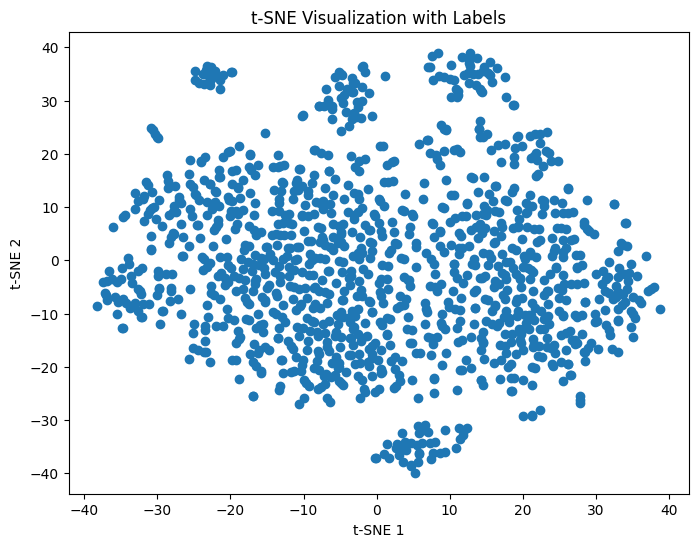

In [33]:
 # Reducing dimensionality with t-SNE

tsne = TSNE(n_components=2, random_state=42)

tsne_data = tsne.fit_transform(processed_data)



plt.figure(figsize=(8, 6))

plt.scatter(tsne_data[:, 0], tsne_data[:, 1])

plt.title('t-SNE Visualization with Labels')

plt.xlabel('t-SNE 1')

plt.ylabel('t-SNE 2')

plt.savefig(f'/content/drive/My Drive/IU/Figures/tsne_simple.png', bbox_inches='tight')

plt.show()





/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1216 samples in 0.001s...
[t-SNE] Computed neighbors for 1216 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1216
[t-SNE] Computed conditional probabilities for sample 1216 / 1216
[t-SNE] Mean sigma: 2.476139
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.902077
[t-SNE] KL divergence after 300 iterations: 1.997738


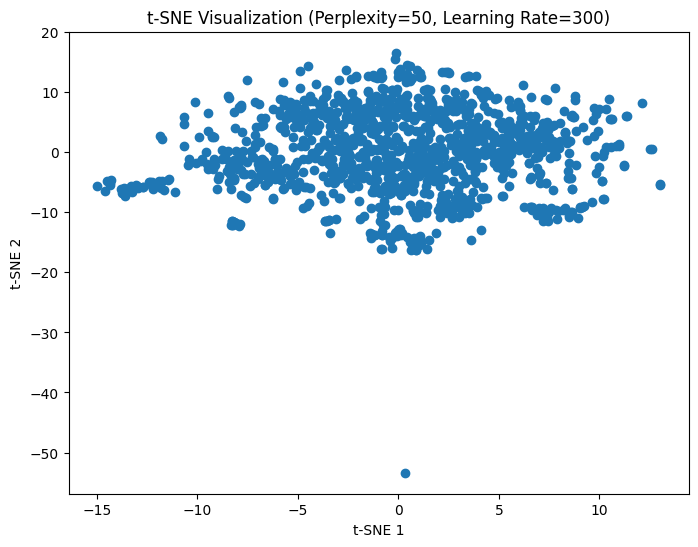

Loaded t-SNE parameters:
 {'n_components': 2, 'perplexity': 50, 'learning_rate': 300, 'n_iter': 300, 'random_state': 42}
Loaded distance matrix:
 [[1.68587394e-07 7.98199972e+00 7.91912889e+00 ... 8.79639885e+00
  9.53926304e+00 9.14911471e+00]
 [7.98199972e+00 0.00000000e+00 9.59988137e+00 ... 9.34772718e+00
  9.41400536e+00 9.34954317e+00]
 [7.91912889e+00 9.59988137e+00 1.68587394e-07 ... 9.45220965e+00
  9.15072202e+00 9.80201426e+00]
 ...
 [8.79639885e+00 9.34772718e+00 9.45220965e+00 ... 0.00000000e+00
  9.06022432e+00 8.37838920e+00]
 [9.53926304e+00 9.41400536e+00 9.15072202e+00 ... 9.06022432e+00
  0.00000000e+00 9.21948722e+00]
 [9.14911471e+00 9.34954317e+00 9.80201426e+00 ... 8.37838920e+00
  9.21948722e+00 0.00000000e+00]]
Perplexity used: 50
Original distance between points 0 and 1: 7.9819997156289295
t-SNE distance between points 0 and 1: 7.140686988830566


In [34]:


# parameter recording
n_components = 2
perplexity = 50
learning_rate = 300
n_iter = 300  # number of iterations
random_state = 42


# calculate pairwise distances (Euclidean)
distance_matrix = pairwise_distances(processed_data, metric='euclidean')  # Or 'cosine', etc.
np.save("/content/drive/My Drive/IU/unsup ml/distance_matrix.npy", distance_matrix)


tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state, verbose=1)

# fit and transform, capturing intermediate embeddings (not directly supported by sklearn's TSNE)
tsne_data = tsne.fit_transform(processed_data)


np.save("/content/drive/My Drive/IU/unsup ml/tsne_embedding.npy", tsne_data)

params = {"n_components": n_components, "perplexity": perplexity, "learning_rate": learning_rate, "n_iter": n_iter, "random_state": random_state}
np.save("/content/drive/My Drive/IU/unsup ml/tsne_params.npy", params)

if 'target_labels' in locals():
    np.save("/content/drive/My Drive/IU/unsup ml/target_labels.npy", target_labels)



plt.figure(figsize=(8, 6))

if 'target_labels' in locals():
    unique_labels = np.unique(target_labels)
    for label in unique_labels:
        indices = target_labels == label
        plt.scatter(tsne_data[indices, 0], tsne_data[indices, 1], label=label)
    plt.legend()
else:
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1])


plt.title(f't-SNE Visualization (Perplexity={perplexity}, Learning Rate={learning_rate})')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.savefig('/content/drive/My Drive/IU/Figures/tsne_visualization.png', bbox_inches='tight')
plt.show()


# loading and analysing
loaded_embedding = np.load("/content/drive/My Drive/IU/unsup ml/tsne_embedding.npy")
loaded_params = np.load("/content/drive/My Drive/IU/unsup ml/tsne_params.npy", allow_pickle=True).item()
loaded_distance_matrix = np.load("/content/drive/My Drive/IU/unsup ml/distance_matrix.npy") # Load distance matrix
if 'target_labels' in locals():
    loaded_labels = np.load("/content/drive/My Drive/IU/unsup ml/target_labels.npy")

print("Loaded t-SNE parameters:\n", loaded_params)
print("Loaded distance matrix:\n", loaded_distance_matrix) # Print distance matrix
if 'target_labels' in locals():
    print("Loaded target labels:\n", loaded_labels)


print("Perplexity used:", loaded_params["perplexity"])

# analyze distances in the original high-dimensional space:
point_i = 0
point_j = 1
original_distance = loaded_distance_matrix[point_i, point_j]
print(f"Original distance between points {point_i} and {point_j}: {original_distance}")

# analyze distances in the t-SNE embedding:
tsne_distance = np.linalg.norm(loaded_embedding[point_i] - loaded_embedding[point_j]) # Euclidean distance
print(f"t-SNE distance between points {point_i} and {point_j}: {tsne_distance}")

# analyze based on labels:
if 'target_labels' in locals():
    for label in np.unique(loaded_labels):
        indices = loaded_labels == label
        cluster_points = loaded_embedding[indices]

        print(f"Cluster {label} points:\n", cluster_points)

###Umap before clustering

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


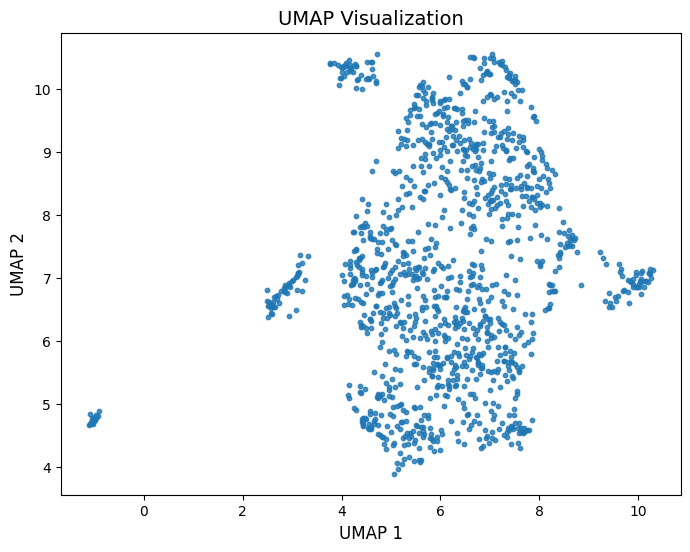

UMAP Visualization Insights:
- Data points show some degree of spread in the UMAP space, suggesting potential clusters.
- The average distance between points in the UMAP space is 3.05.
- Regions of higher point density in the plot *may* indicate groups of similar data points.


In [35]:
#umap




directory = '/content/drive/My Drive/IU/unsup_ml'
if not os.path.exists(directory):
    os.makedirs(directory)

# reduce dimensionality using UMAP
umap_model = UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(processed_data)


plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], s=10, alpha=0.8)
plt.title('UMAP Visualization', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.savefig(f'{directory}/umap_visualization.png', bbox_inches='tight')
plt.show()


print("UMAP Visualization Insights:")

# 1. check for cluster-like structures
if len(set(umap_data[:, 0])) > 10 and len(set(umap_data[:, 1])) > 10:
    print("- Data points show some degree of spread in the UMAP space, suggesting potential clusters.")
else:
    print("- Data points are relatively uniformly distributed, and clustering may not be apparent.")

# density information
average_distance = np.mean([np.linalg.norm(umap_data[i] - umap_data[j]) for i in range(len(umap_data)) for j in range(i+1, len(umap_data))])
print(f"- The average distance between points in the UMAP space is {average_distance:.2f}.")
print("- Regions of higher point density in the plot *may* indicate groups of similar data points.")



### KMeans

The Elbow Method suggests 7 clusters as the optimal number based on the lowest inertia (1173.51).


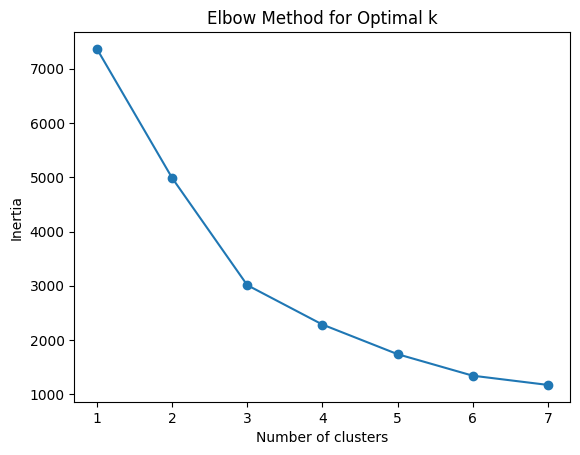

In [36]:
#KMeans

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




kmeans_data = umap_data.copy()

# for optimal clusters (Elbow Method):

inertia = []
k_values = range(1, 8)  # Adjust the range for more/fewer clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # initialize KMeans with k clusters
    kmeans.fit(kmeans_data)                         # fit the model
    inertia.append(kmeans.inertia_)                 # append the inertia to the list


lowest_inertia_index = inertia.index(min(inertia))
optimal_k = k_values[lowest_inertia_index]

print(f"The Elbow Method suggests {optimal_k} clusters as the optimal number based on the lowest inertia ({min(inertia):.2f}).")



plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.savefig(f'/content/drive/My Drive/IU/Figures/elbow_method.png', bbox_inches='tight')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Average Silhouette Score: 0.4460570216178894


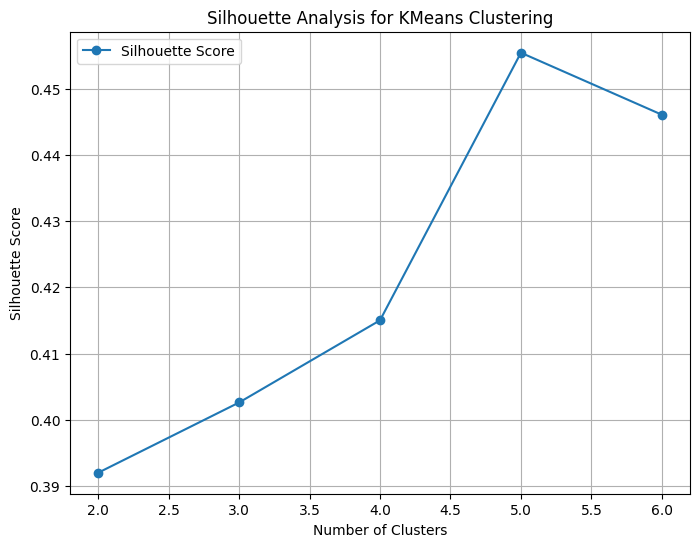

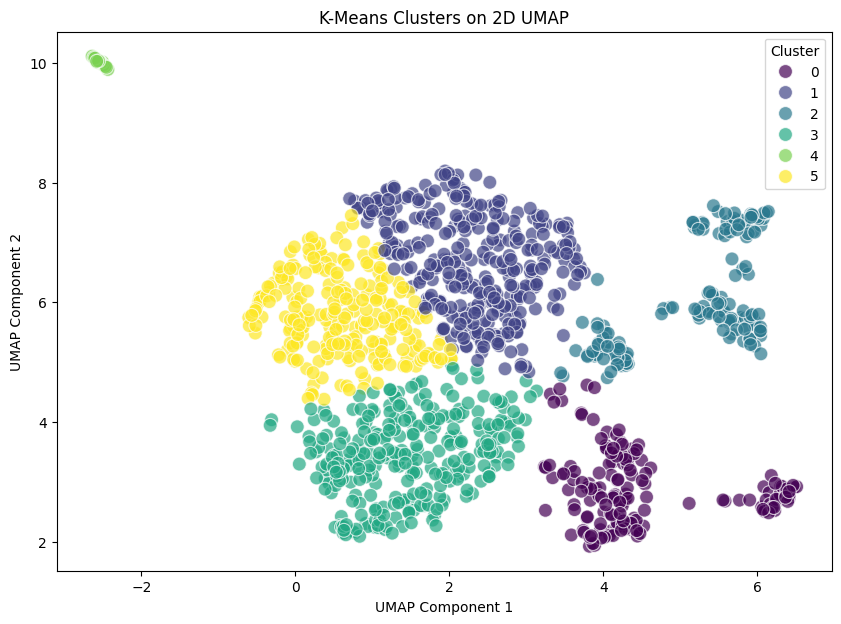

In [37]:


# OrdinalEncoder object
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_cols])

#  preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('ord', ordinal_encoder, ordinal_cols)
    ]
)


data_processed = data.copy()

# fit-transform the data
data_processed_transformed = preprocessor.fit_transform(data_processed)

# scale the data
scaler = StandardScaler()
data_processed_transformed_scaled = scaler.fit_transform(data_processed_transformed)

# reduce dimensionality using UMAP
umap_model = UMAP(n_components=2, random_state=42, min_dist=0.1)
umap_data = umap_model.fit_transform(data_processed_transformed_scaled)


kmeans_data = umap_data.copy()


optimal_k = 6  # Replace with the chosen value


kmeans = KMeans(n_clusters=optimal_k, n_init=5000, random_state=42)
cluster_labels = kmeans.fit_predict(kmeans_data)



processed_data['Cluster'] = cluster_labels



# silhouette scores for each sample
silhouette_vals = silhouette_samples(kmeans_data, cluster_labels)

# average silhouette score
avg_score = silhouette_score(kmeans_data, cluster_labels)

# number of clusters
n_clusters = len(np.unique(cluster_labels))


print(f"Average Silhouette Score: {avg_score}")




cluster_range = range(2, n_clusters + 1)

silhouette_scores = []

for k in cluster_range:

    kmeans_model = KMeans(n_clusters=k, n_init=5000, random_state=42)
    kmeans_model.fit(kmeans_data)


    silhouette_measure = silhouette_samples(kmeans_data, kmeans_model.labels_)
    silhouette_scores.append(silhouette_measure.mean())


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, 'o-', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.legend()
plt.grid(True)
plt.savefig(f'/content/drive/My Drive/IU/Figures/silhouette_analysis.png', bbox_inches='tight')
plt.show()


# 2D UMAP Visualization:

plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clusters on 2D UMAP')
plt.legend(title='Cluster')
plt.savefig(f'/content/drive/My Drive/IU/Figures/kmeans_data.png', bbox_inches='tight')
plt.show()

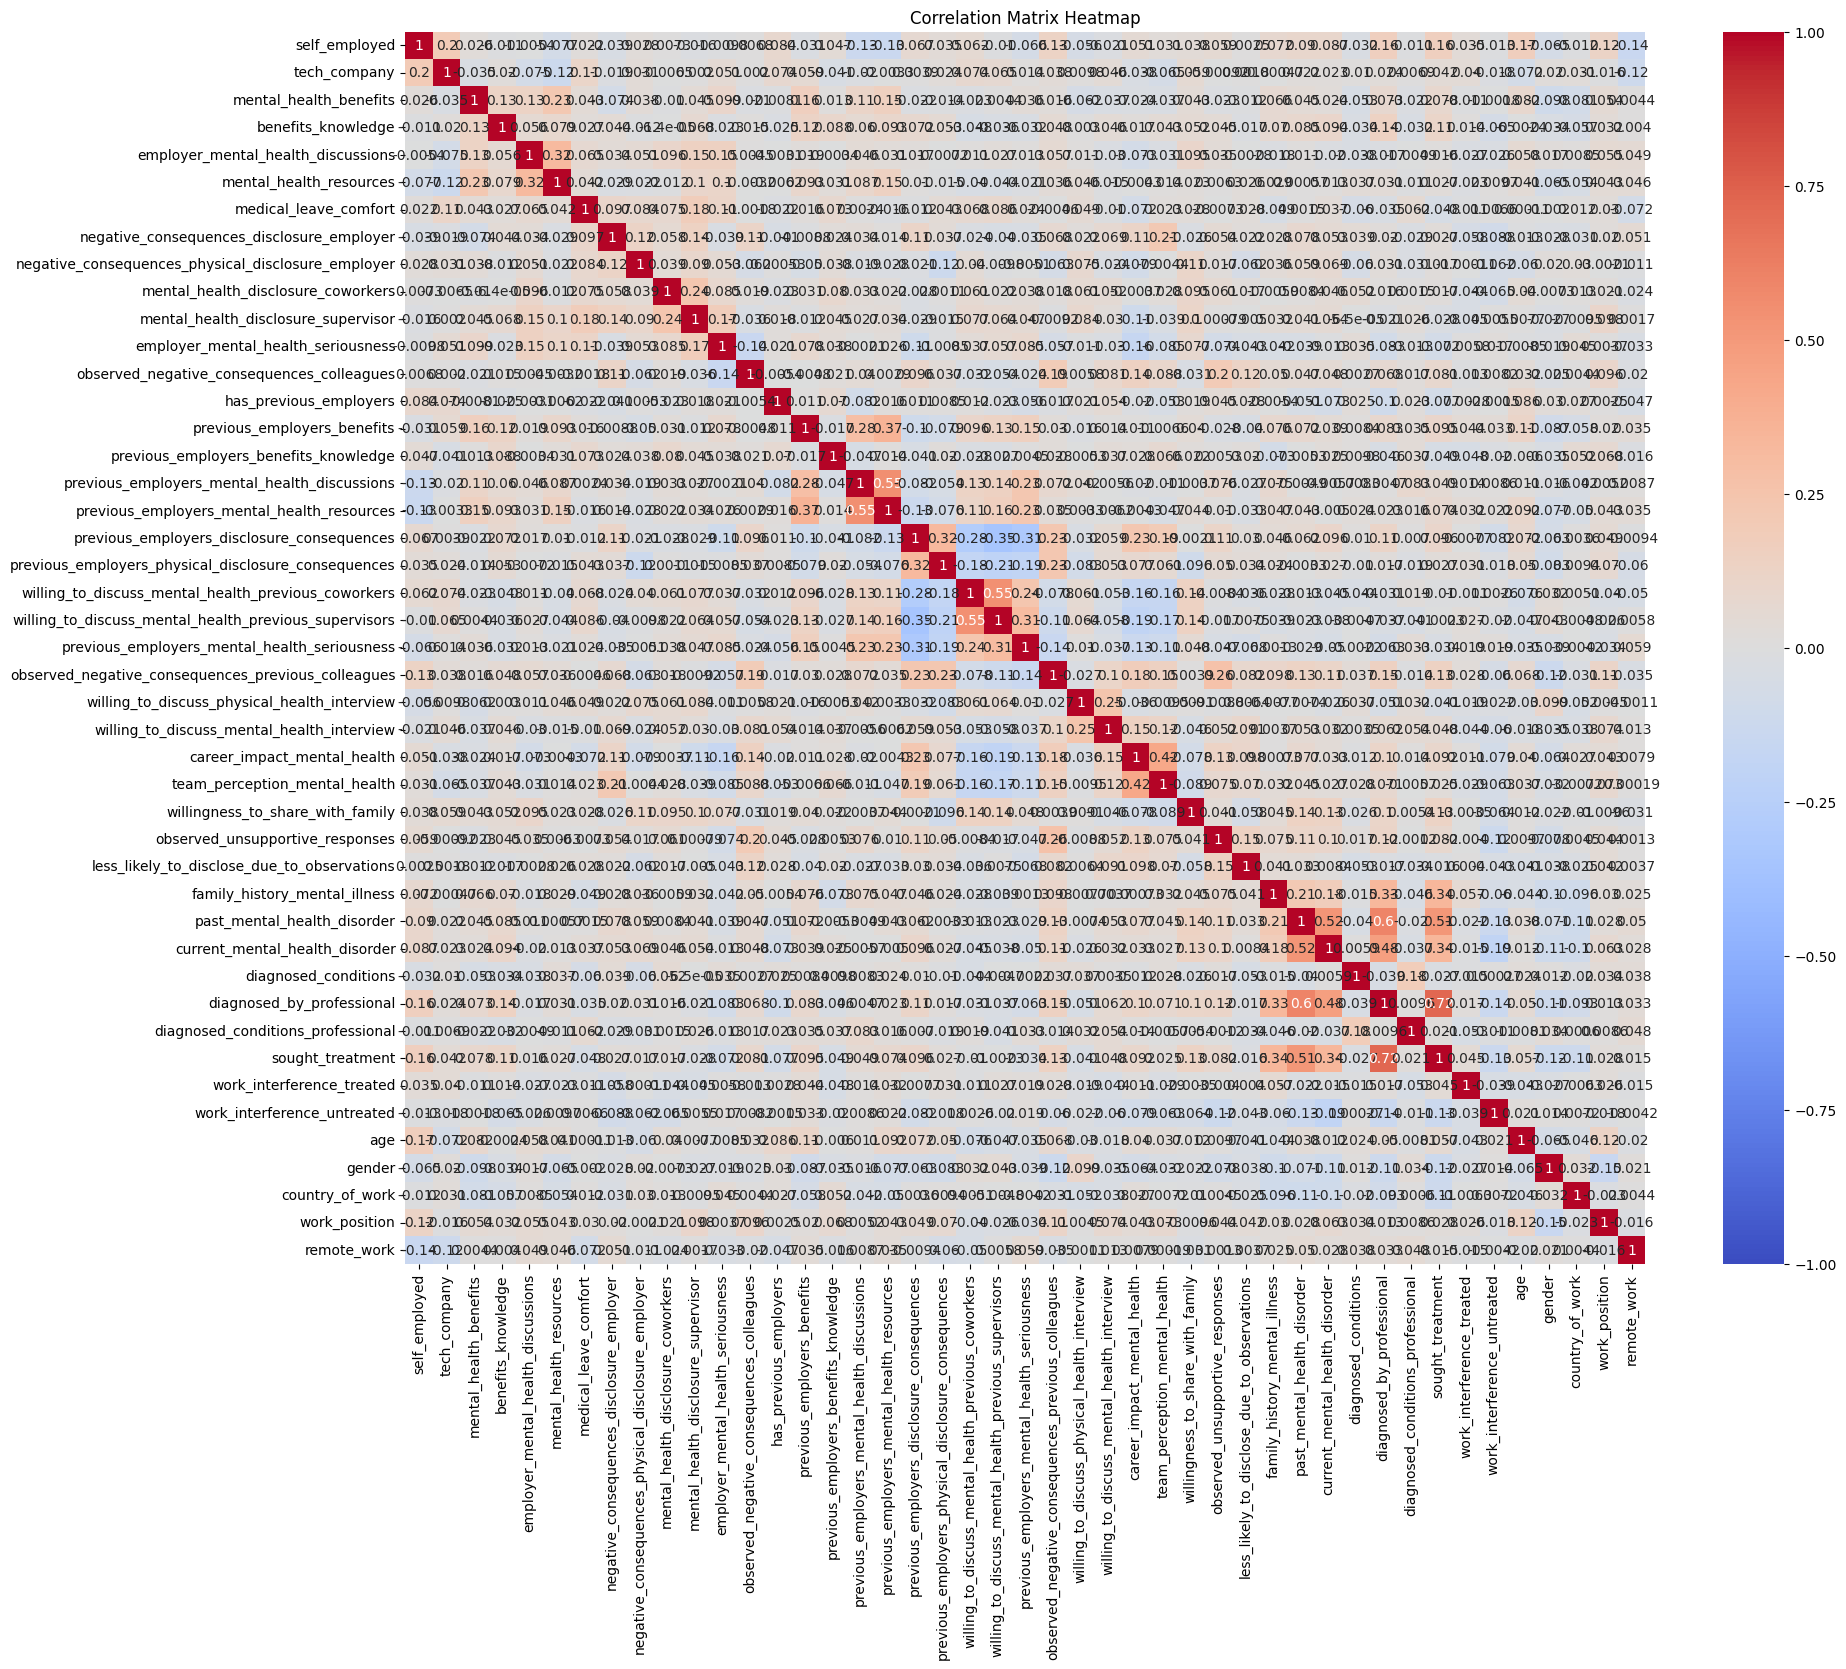

In [38]:


# columns related to work experience and mental health
relevant_columns = ['self_employed', 'tech_company',
       'mental_health_benefits', 'benefits_knowledge',
       'employer_mental_health_discussions', 'mental_health_resources',
       'medical_leave_comfort', 'negative_consequences_disclosure_employer',
       'negative_consequences_physical_disclosure_employer',
       'mental_health_disclosure_coworkers',
       'mental_health_disclosure_supervisor',
       'employer_mental_health_seriousness',
       'observed_negative_consequences_colleagues', 'has_previous_employers',
       'previous_employers_benefits', 'previous_employers_benefits_knowledge',
       'previous_employers_mental_health_discussions',
       'previous_employers_mental_health_resources',
       'previous_employers_disclosure_consequences',
       'previous_employers_physical_disclosure_consequences',
       'willing_to_discuss_mental_health_previous_coworkers',
       'willing_to_discuss_mental_health_previous_supervisors',
       'previous_employers_mental_health_seriousness',
       'observed_negative_consequences_previous_colleagues',
       'willing_to_discuss_physical_health_interview',
       'willing_to_discuss_mental_health_interview',
       'career_impact_mental_health', 'team_perception_mental_health',
       'willingness_to_share_with_family', 'observed_unsupportive_responses',
       'less_likely_to_disclose_due_to_observations',
       'family_history_mental_illness', 'past_mental_health_disorder',
       'current_mental_health_disorder', 'diagnosed_conditions',
       'diagnosed_by_professional', 'diagnosed_conditions_professional',
       'sought_treatment', 'work_interference_treated',
       'work_interference_untreated', 'age', 'gender', 'country_of_work',
       'work_position', 'remote_work'

]

# correlation matrix for the selected columns
df_encoded = df[relevant_columns].copy()

# init LabelEncoder
le = LabelEncoder()


for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


# calculate the correlation matrix for the encoded columns
correlation_matrix = df_encoded.corr()


plt.figure(figsize=(20, 16)) # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.savefig(f'/content/drive/My Drive/IU/Figures/heatmap_corr.png', bbox_inches='tight')
plt.show()

In [40]:
print(df.columns)

Index(['self_employed', 'company_size', 'tech_company',
       'mental_health_benefits', 'benefits_knowledge',
       'employer_mental_health_discussions', 'mental_health_resources',
       'medical_leave_comfort', 'negative_consequences_disclosure_employer',
       'negative_consequences_physical_disclosure_employer',
       'mental_health_disclosure_coworkers',
       'mental_health_disclosure_supervisor',
       'employer_mental_health_seriousness',
       'observed_negative_consequences_colleagues', 'has_previous_employers',
       'previous_employers_benefits', 'previous_employers_benefits_knowledge',
       'previous_employers_mental_health_discussions',
       'previous_employers_mental_health_resources',
       'previous_employers_disclosure_consequences',
       'previous_employers_physical_disclosure_consequences',
       'willing_to_discuss_mental_health_previous_coworkers',
       'willing_to_discuss_mental_health_previous_supervisors',
       'previous_employers_mental_hea

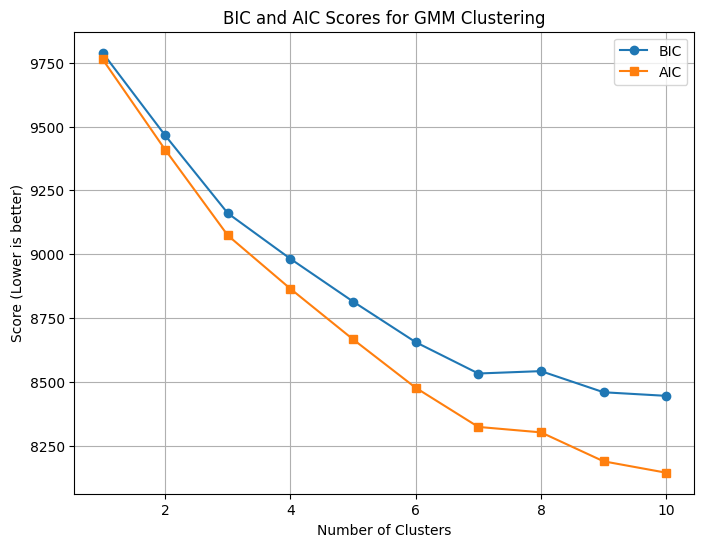

In [44]:
#Gaussian mixture models
#Elbow Curve (BIC/AIC)



gmm_data = umap_data.copy()
# adjust as needed
n_components_range = range(1, 11)  # Test from 1 to 10 clusters


bic = []
aic = []



for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=200, random_state=42)
    gmm.fit(gmm_data)

    bic.append(gmm.bic(gmm_data))
    aic.append(gmm.aic(gmm_data))



plt.figure(figsize=(8, 6))

plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.plot(n_components_range, aic, marker='s', label='AIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (Lower is better)')
plt.title('BIC and AIC Scores for GMM Clustering')
plt.legend()
plt.grid(True)  # add gridlines
plt.savefig(f'/content/drive/My Drive/IU/Figures/GMM_BIC_AIC_curve.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


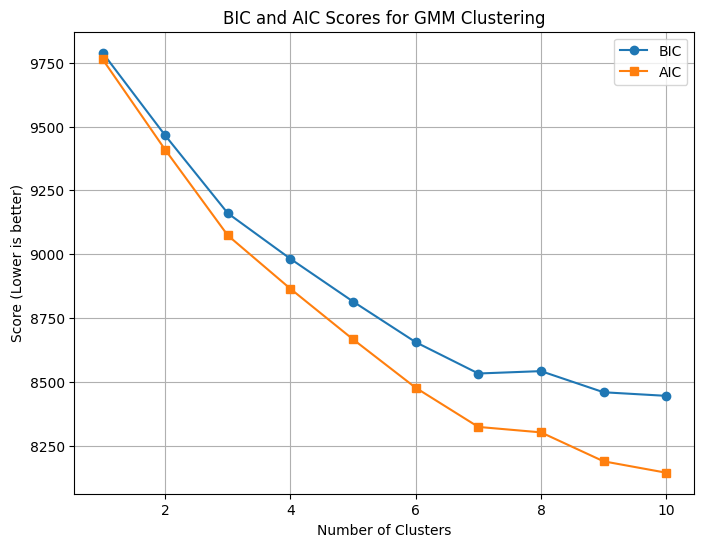

**Textual Insights (Choosing K):**
  - Based on the BIC/AIC plot, the chosen number of clusters (K) is 6.


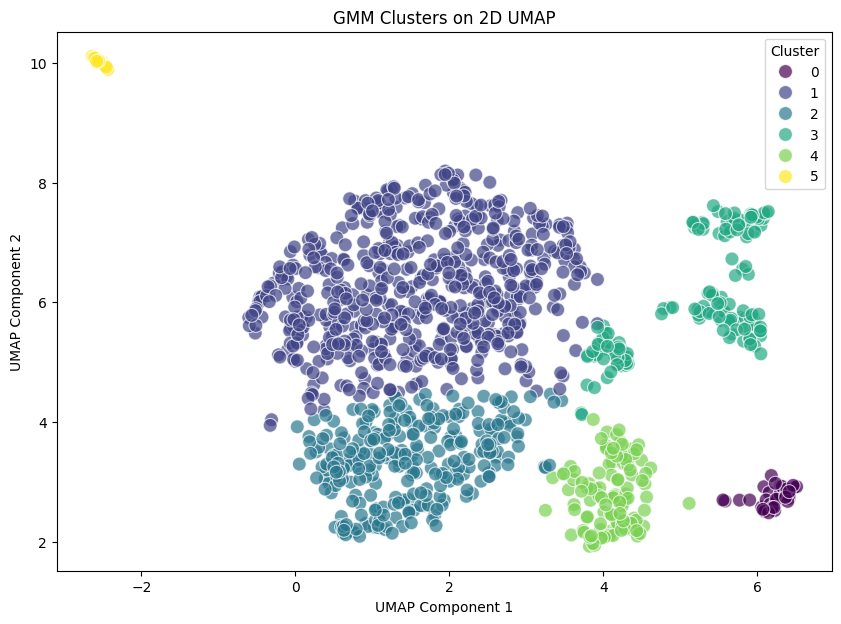

**Textual Insights (Silhouette Score):**
  - The average silhouette score for this clustering is 0.45.
  - A score above 0.5 indicates good separation between clusters.


In [45]:


# OrdinalEncoder object
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_cols])

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('ord', ordinal_encoder, ordinal_cols)
    ]
)


data_processed = data.copy()

# fit-transform the data
data_processed_transformed = preprocessor.fit_transform(data_processed)

# scale the data
scaler = StandardScaler()
data_processed_transformed_scaled = scaler.fit_transform(data_processed_transformed)

# reduce dimensionality using UMAP
umap_model = UMAP(n_components=2, random_state=42, min_dist=0.1)
umap_data = umap_model.fit_transform(data_processed_transformed_scaled)



gmm_data = umap_data.copy()

# optimal Clusters using BIC and AIC:

n_components_range = range(1, 11)  # tested 1 to 10 clusters
bic = []
aic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=200, random_state=42)
    gmm.fit(gmm_data)
    bic.append(gmm.bic(gmm_data))
    aic.append(gmm.aic(gmm_data))

plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.plot(n_components_range, aic, marker='s', label='AIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (Lower is better)')
plt.title('BIC and AIC Scores for GMM Clustering')
plt.legend()
plt.grid(True)
plt.savefig(f'/content/drive/My Drive/IU/Figures/GMM_BIC_AIC_curve.png', bbox_inches='tight')
plt.show()

optimal_n_components = 6  # observed optimal value

print(f"**Textual Insights (Choosing K):**")
print(f"  - Based on the BIC/AIC plot, the chosen number of clusters (K) is {optimal_n_components}.")

# fit GMM Model:

gmm = GaussianMixture(n_components=optimal_n_components, n_init=100, random_state=42, covariance_type='full')
gmm.fit(gmm_data)



cluster_labels = gmm.predict(gmm_data)
cluster_probabilities = gmm.predict_proba(gmm_data)



# silhouette analysis:

silhouette_vals = silhouette_samples(gmm_data, cluster_labels)
avg_score = silhouette_score(gmm_data, cluster_labels)
n_clusters = len(np.unique(cluster_labels))



plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_data[:, 0], y=umap_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('GMM Clusters on 2D UMAP')
plt.legend(title='Cluster')
plt.savefig(f'/content/drive/My Drive/IU/Figures/GMM_UMAP_2D.png', bbox_inches='tight')
plt.show()



print(f"**Textual Insights (Silhouette Score):**")
print(f"  - The average silhouette score for this clustering is {avg_score:.2f}.")
print(f"  - A score above 0.5 indicates good separation between clusters.")
